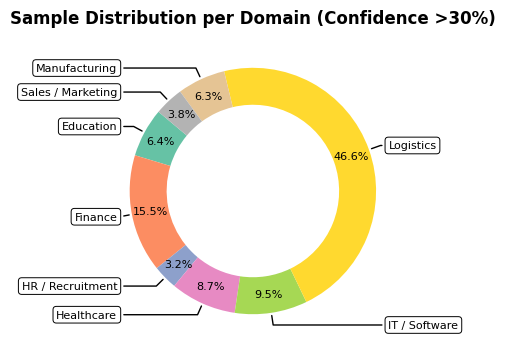

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("classified_domains.csv")
domain_filtered = df[df["confidence_score"] > 0.3]
domain_counts = domain_filtered["domain"].value_counts().sort_index()
plt.figure(figsize=(5, 4))

colors = sns.color_palette("Set2", len(domain_counts))

wedges, _ = plt.pie(
    domain_counts.values,
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.3),
    normalize=True
)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center", fontsize=8)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    percentage = 100 * (p.theta2 - p.theta1) / 360
    plt.annotate(
        f"{percentage:.1f}%", 
        xy=(x*0.85, y*0.85),
        ha='center', va='center', fontsize=8, color='black'
    )
    
    label = domain_counts.index[i]
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(1.1*np.sign(x), 1.1*y),
        horizontalalignment=horizontalalignment,
        **kw
    )

plt.title("Sample Distribution per Domain (Confidence >30%)", fontsize=12, weight="bold", pad=10)
plt.show()
